# EIT Continous Model - Solver

In [1]:
from module1_mesh import*
from module2_forward import*
from module3_inverse import*
from module4_auxiliar import*
import matplotlib.pyplot as plt
#from fenics import*

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


## Defining mesh

In [2]:
mesh_inverse, mesh_direct=MyMesh(r=1, n=8, n_vertex=285)
mesh_direct=refine(mesh_direct)

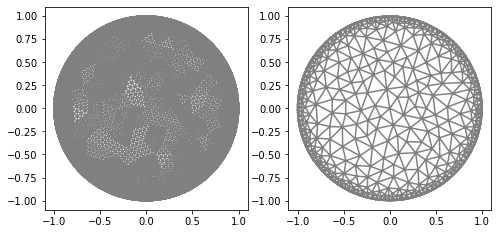

In [3]:
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plot(mesh_direct);
plt.subplot(1,2,2)
plot(mesh_inverse);

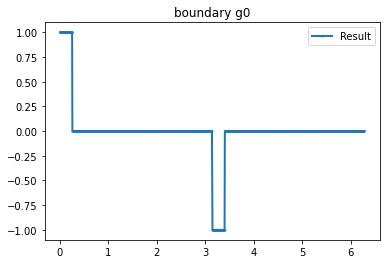

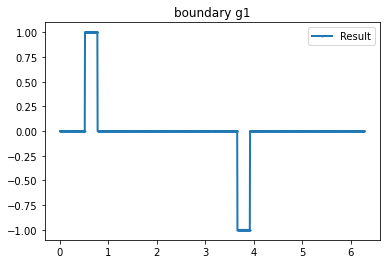

In [4]:
"Current"
n_g=6 #Number currents
I_all=current_method(n_g, value=1, method=1) #Creating current

#Plotting
for i in range(n_g):
    if i<=1:
        mesh=mesh_direct
        VD=FiniteElement('CG',mesh.ufl_cell(),1) 
        g_u=interpolate(I_all[i], FunctionSpace(mesh,VD))
        g_u=getBoundaryVertex(mesh, g_u)
        bond=plot_boundary(mesh, data=g_u, name='boundary g'+str(i))


In [5]:
print("Mesh Direct:")
Verifyg(I_all, mesh_direct)
print("Mesh Inverse:")
Verifyg(I_all, mesh_inverse)

Mesh Direct:
Integral boundary: 7.45931094670027e-17 0
Integral boundary: -1.964574336543734e-16 1
Integral boundary: -1.3183898417423734e-16 2
Integral boundary: -1.2663481374630692e-16 3
Integral boundary: 4.774826367626162e-16 4
Integral boundary: -3.8510861166685117e-16 5
Integral boundary g(0)*g(1): 0.0
Integral boundary g(0)*g(2): 0.0
Integral boundary g(0)*g(3): 0.0
Integral boundary g(0)*g(4): 0.0
Integral boundary g(0)*g(5): 0.0
Integral boundary g(1)*g(2): 0.0
Integral boundary g(1)*g(3): 0.0
Integral boundary g(1)*g(4): 0.0
Integral boundary g(1)*g(5): 0.0
Integral boundary g(2)*g(3): 0.0
Integral boundary g(2)*g(4): 0.0
Integral boundary g(2)*g(5): 0.0
Integral boundary g(3)*g(4): 0.0
Integral boundary g(3)*g(5): 0.0
Integral boundary g(4)*g(5): 0.0
Mesh Inverse:
Integral boundary: -9.194034422677078e-17 0
Integral boundary: -1.960237527853792e-16 1
Integral boundary: -1.1796119636642288e-16 2
Integral boundary: -1.3704315460216776e-16 3
Integral boundary: 3.972516759986888

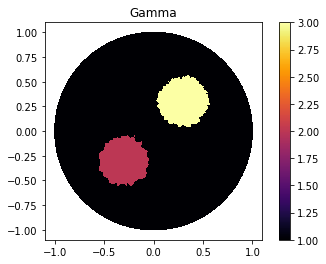

In [6]:
"Defining gamma"
ValuesCells0=GammaCircle(mesh_direct,3,1,0.25, 0.30, 0.30); #malha, cond_interna, cond_externa, raio.
ValuesCells1=GammaCircle(mesh_direct,1, 0,0.25, -0.30, -0.30); #malha, cond_interna, cond_externa, raio.
gamma0=CellFunction(mesh_direct, values=ValuesCells0+ValuesCells1);#Pega o vetor e transforma em uma função

"Plot"
V_DG=FiniteElement('DG',mesh_inverse.ufl_cell(),0)
gamma_direct=plot_figure(mesh_direct, V_DG, gamma0, name="Gamma");

In [7]:
"ForwardProblem"
VD=FiniteElement('CG',mesh_direct.ufl_cell(),1)       #Defining space
ForwardObject=ForwardProblem(mesh_direct)               #Defining object
list_u0=ForwardObject.solve_forward(VD, gamma0, I_all)  #Solver
u0_boundary=ForwardObject.boundary_array(mesh_inverse) #Boundary data

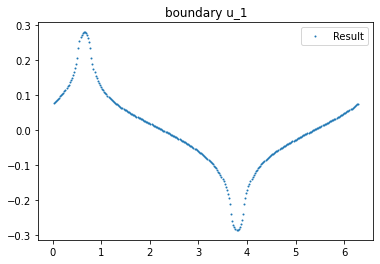

In [8]:
data_u0=ForwardObject.plot_boundary(mesh_inverse, index=1)

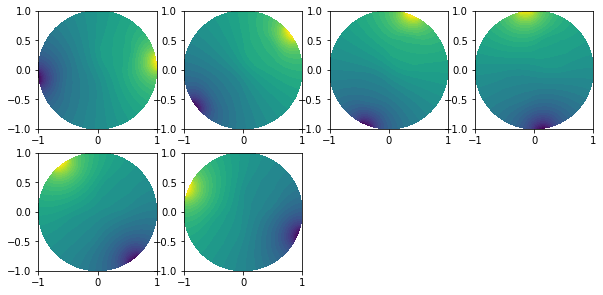

In [9]:
plt.figure(figsize=(10, 10))
for i in range(0, n_g):
    plt.subplot(4,4,i+1)
    plot(list_u0[i])

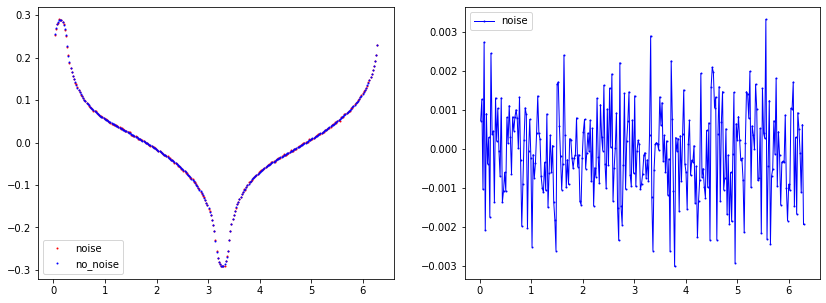

In [10]:
"Noise Parameters"
noise_level=0.01
noise_type='uniform'
seed=1
u0_boundary=ForwardObject.add_noise(noise_level, noise_type, seed, mesh_inverse)
end=len(u0_boundary)
    
index=0
if noise_level>1E-5:
    u0_boundary_c=ForwardObject.boundary_array(mesh_inverse, concatenate=False) #Data without noise
    u_dados_noise=u0_boundary[0:int(end/n_g)] # First experiment
    data_u0=plot_boundary(mesh_inverse, data=u0_boundary_c[index], name='boundary u0_0', line=0, plot=False)
    data_u0_noise=plot_boundary(mesh_inverse, data=u_dados_noise, name='boundary u0_0', line=0, plot=False)
    
    plt.figure(figsize=(14, 5))
    plt.subplot(1,2,1)
    plt.plot(data_u0_noise[:,0], data_u0_noise[:,1], linewidth=0,  marker='.', markersize=2, label="noise", color='red');
    plt.plot(data_u0[:,0], data_u0[:,1], linewidth=0,  marker='.', markersize=2, label="no_noise", color="blue");
    plt.legend()
   
    plt.subplot(1,2,2)
    plt.plot(data_u0[:,0], data_u0[:,1]-data_u0_noise[:,1], linewidth=1,  marker='.', markersize=2, label="noise", color="blue");
    plt.legend()
    
    plt.show()
    